## Монтируем гугл-диск к виртуальной машине

In [2]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Скачиваем репозиторий курса

In [67]:


%cd /content/drive/MyDrive/
%pwd


os.makedirs ('UClim4HSE', exist_ok = True)

%cd /content/drive/MyDrive/UClim4HSE/
%pwd

if not os.path.isdir('/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025'):
  print ('cloning repository')
  !git clone https://github.com/mvarentsov/UClim4HSE-2025.git
else:
  print ('updating repository')
  %cd /content/drive/MyDrive/UClim4HSE/UClim4HSE-2025/
  ! git pull

%cd /content/drive/MyDrive/UClim4HSE/


/content/drive/MyDrive
/content/drive/MyDrive/UClim4HSE
updating repository
/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025
Already up to date.
/content/drive/MyDrive/UClim4HSE


In [24]:
sys.path.append('/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025/scripts/')
import meteo_utils
from datetime import date, datetime, timedelta

In [53]:

station_id = 27518     # идентификатор станции, с которой нужны наблюдения
start = date (2023,1,1) # начало периода загрузки данных
end = date.today()      # конец  периода загрузки данных

meteo_utils.load_weaclim4period (station_id, start, end, 'weaclim_data', adress="http://www.pogodaiklimat.ru/weather.php?")


Loading weaclim data for 27518: 100%|██████████| 25/25 [02:47<00:00,  6.70s/it, Processing: 2025-01]


In [60]:

df_urb = meteo_utils.read_weaclim_dir ('weaclim_data/27605')
df_rur = meteo_utils.read_weaclim_dir ('weaclim_data/27518')

df_urb = df_urb.rename(columns = {x:'urb_' + x for x in df_urb.columns})
df_rur = df_rur.rename(columns = {x:'rur_' + x for x in df_rur.columns})

df = df_urb.merge (df_rur, left_index=True, right_index=True)
display(df.head())


,urb_t2m,urb_rh2m,urb_slp,urb_ps,urb_vel10m,urb_gust10m,urb_tcc,urb_lcc,urb_dir10m,rur_t2m,rur_rh2m,rur_slp,rur_ps,rur_vel10m,rur_gust10m,rur_tcc,rur_lcc,rur_dir10m
Datetime,,,,,,,,,,,,,,,,,,
2023-01-02 03:00:00,2.3,84.0,1007.5,992.0,3.0,NaN,10.0,10.0,315.0,1.3,99.0,1008.6,987.5,3.0,NaN,10.0,10.0,315.0
2023-01-02 06:00:00,0.8,78.0,1011.6,996.0,3.0,NaN,10.0,0.0,270.0,-0.8,96.0,1012.6,991.2,1.0,NaN,0.0,0.0,315.0
2023-01-02 09:00:00,0.8,66.0,1014.4,998.7,3.0,NaN,0.0,0.0,270.0,0.9,70.0,1015.2,993.9,1.0,NaN,1.0,0.0,315.0
2023-01-02 12:00:00,0.7,63.0,1017.0,1001.3,3.0,10.0,3.0,0.0,270.0,-0.1,71.0,1017.8,996.4,2.0,NaN,8.0,0.0,315.0
2023-01-02 15:00:00,-0.1,67.0,1018.5,1002.7,2.0,NaN,0.0,0.0,270.0,-1.6,79.0,1019.6,998.0,1.0,NaN,1.0,0.0,270.0


Text(0, 0.5, 'Temperature[K]')

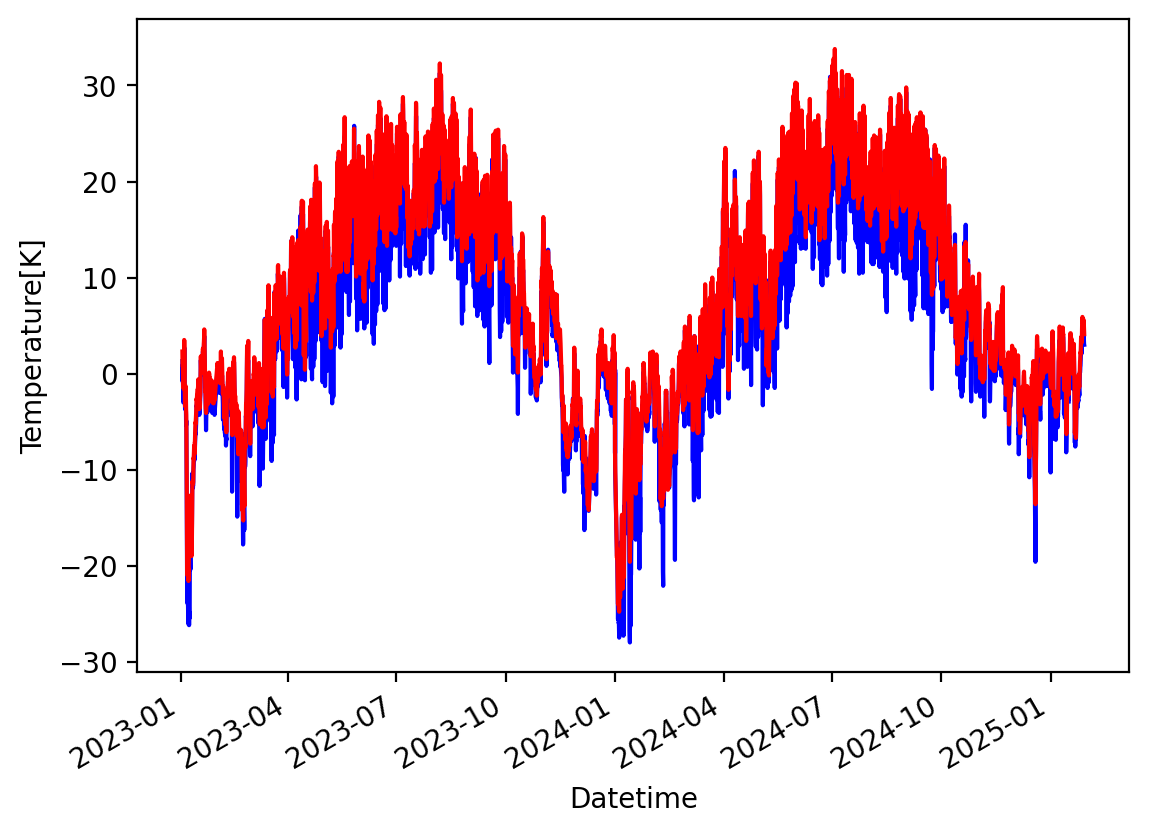

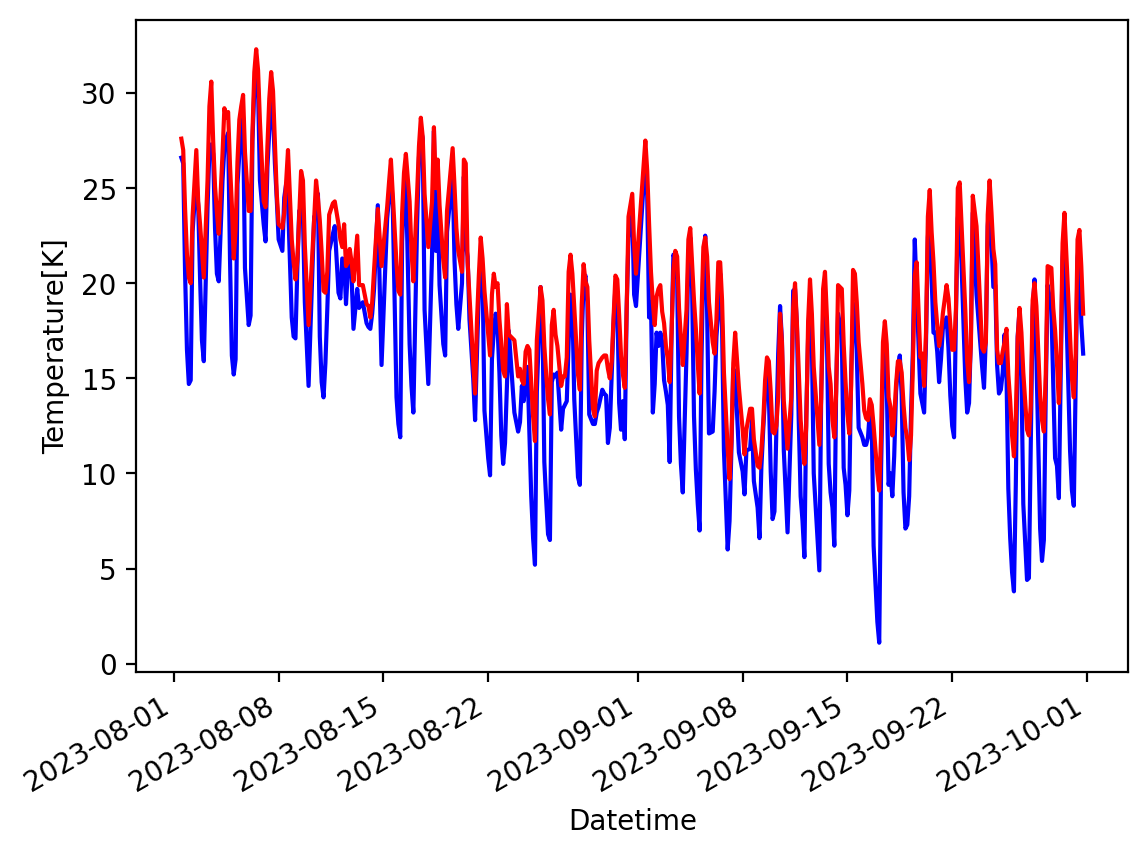

In [77]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

plt.figure()
df['rur_t2m'].plot(color = 'blue')
df['urb_t2m'].plot(color = 'red')
plt.ylabel ('Temperature[K]')

df_sel = df['2023-08':'2023-09']
plt.figure()
df_sel['rur_t2m'].plot(color = 'blue')
df_sel['urb_t2m'].plot(color = 'red')
plt.ylabel ('Temperature[K]')



## Интерактивный график с помощью plotly

In [63]:

import plotly.express as px

fig = px.line(df, y=['rur_t2m', 'urb_t2m'], title='Simple Time Series Plot') #, labels={'Value': 'Cumulative Value'})
fig.data[0].line.color = 'blue'  # Color for 'rur_t2m'
fig.data[1].line.color = 'orange'  # Color for 'urb_t2m'
fig.show()